# Exploring and processing the datasets

---

> This section explores the datasets by showing some images from it, and also demonstrates how balanced it is. After that it processes the datasets by splitting them into train, validation, and test sets.

## Importing the libraries

In [99]:
import os
import shutil
import matplotlib.pyplot as plt
import splitfolders
import cv2

## 1. Exploring the dataset

### 1.1 How balanced are the datasets?

#### Get paths of the raw datasets

In [114]:
raw_zenodo_path = './datasets/data/raw/Zenodo_Dataset'
raw_vtid2_path = './datasets/data/raw/htsngg9tpc-2'

In [115]:
# Function to get info for a dataset, how many files are in each class

def get_dataset_info(dataset_path):

  classes = os.listdir(dataset_path)
  if '.DS_Store' in classes:
    classes.remove('.DS_Store')
  data = {}

  for item in classes:
      path = dataset_path + "/" + item
      no_of_files = len([i for i in os.listdir(path) if os.path.isfile(os.path.join(path, i))])
      data[item] = no_of_files

  return data

zenodo_info = get_dataset_info(raw_zenodo_path)
vtid2_info = get_dataset_info(raw_vtid2_path)


#### Plot a bar plot of the primary (Zenodo) dataset info to see how balanced it is

<BarContainer object of 6 artists>

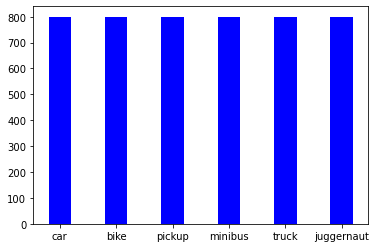

In [116]:
plt.bar(zenodo_info.keys(), zenodo_info.values(), color ='blue',
        width = 0.4)

#### Plot a bar plot of the secondary (VTID2) dataset info to see how balanced it is

<BarContainer object of 5 artists>

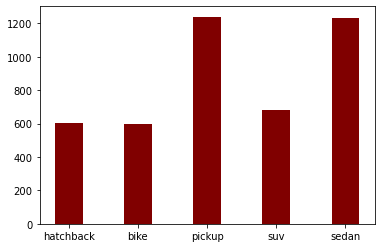

In [117]:
plt.bar(vtid2_info.keys(), vtid2_info.values(), color ='maroon',
        width = 0.4)

### 1.2 What do the datasets look like?

**Code to extract a few images for each class from each dataset in order to display it**

In [118]:
# Get the list of classes for each dataset 

zenodo_classes, vtid2_classes = [], []
zenodo_classes = os.listdir(raw_zenodo_path)
vtid2_classes = os.listdir(raw_vtid2_path)
if '.DS_Store' in zenodo_classes:
  zenodo_classes.remove('.DS_Store')
if '.DS_Store' in vtid2_classes:
  vtid2_classes.remove('.DS_Store')

# Extract images from the dataset segregated by class

def extract_images(ds_classes, path):
  images_by_class = {}
  for c in ds_classes:
    imgs = []
    c_path = path + "/" + c
    for i in range(5):
      imgs.append(c_path + '/' +os.listdir(c_path)[i])
    images_by_class[c] = imgs

  return images_by_class

zenodo_imgs = extract_images(zenodo_classes, raw_zenodo_path)
vtid2_imgs = extract_images(vtid2_classes, raw_vtid2_path)


#### Display images from the primary (Zenodo) dataset

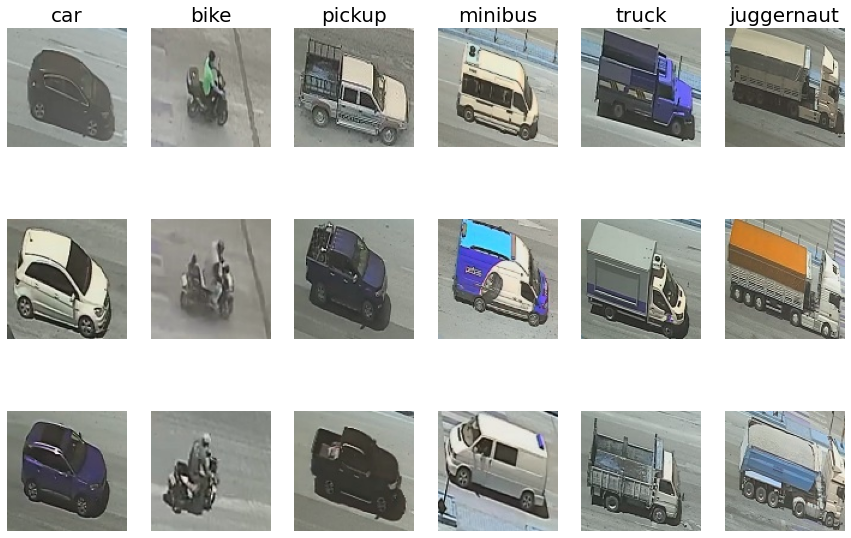

In [119]:
rows = 3
cols = 6

# define subplot
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

# For each class, plot 3 three in a column
for i in range(len(zenodo_classes)):
  axes[0, i].set_title(zenodo_classes[i], fontsize=20)
  for j in range(rows):
    img = cv2.imread(zenodo_imgs[zenodo_classes[i]][j])
    axes[j, i].imshow(img)
    axes[j, i].axis('off')
    if j == 0:
      axes[j, i].set_ylabel(zenodo_classes[i])


#### Display images from the secondary (VTID2) dataset

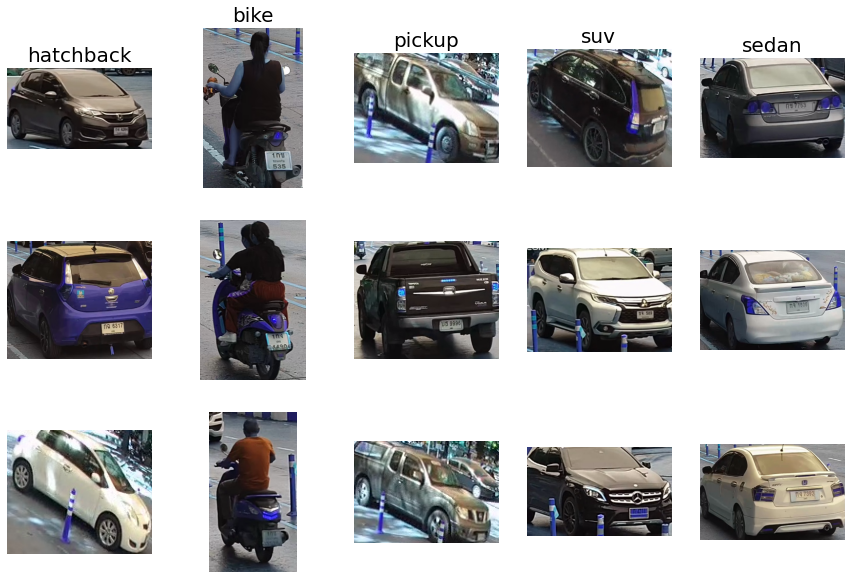

In [120]:
rows = 3
cols = 5

# define subplot
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

# For each class, plot 3 three in a column
for i in range(len(vtid2_classes)):
  axes[0, i].set_title(vtid2_classes[i], fontsize=20)
  for j in range(rows):
    img = cv2.imread(vtid2_imgs[vtid2_classes[i]][j])
    axes[j, i].imshow(img)
    axes[j, i].axis('off')
    if j == 0:
      axes[j, i].set_ylabel(vtid2_classes[i])


## 2. Create train, validation, and test split

> Using the split-folders library split the datasets:

In [121]:
# Set paths for raw data folders and output split folders

input_path_zenodo = raw_zenodo_path
output_path_zenodo = 'datasets/data/split/Zenodo'

input_path_vtid = raw_vtid2_path
output_path_vtid = 'datasets/data/split/VTID2'

# Delete the split folder if it exists
if os.path.exists('./datasets/data/split') and os.path.isdir('./datasets/data/split'):
    shutil.rmtree('./datasets/data/split')

# Split Zenodo dataset into train, validation and test folders
splitfolders.ratio(input_path_zenodo, output=output_path_zenodo,
                   seed=1337, ratio=(0.8, 0.1, 0.1),
                   group_prefix=None)

# Split VTID2 dataset into train, validation and test folders
splitfolders.ratio(input_path_vtid, output=output_path_vtid,
                   seed=1337, ratio=(0.8, 0.1, 0.1),
                   group_prefix=None)

Copying files: 4800 files [00:01, 2731.97 files/s]
Copying files: 4356 files [00:01, 2976.03 files/s]
